<a href="https://colab.research.google.com/github/aceiro/colab/blob/main/series_linhas_processors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

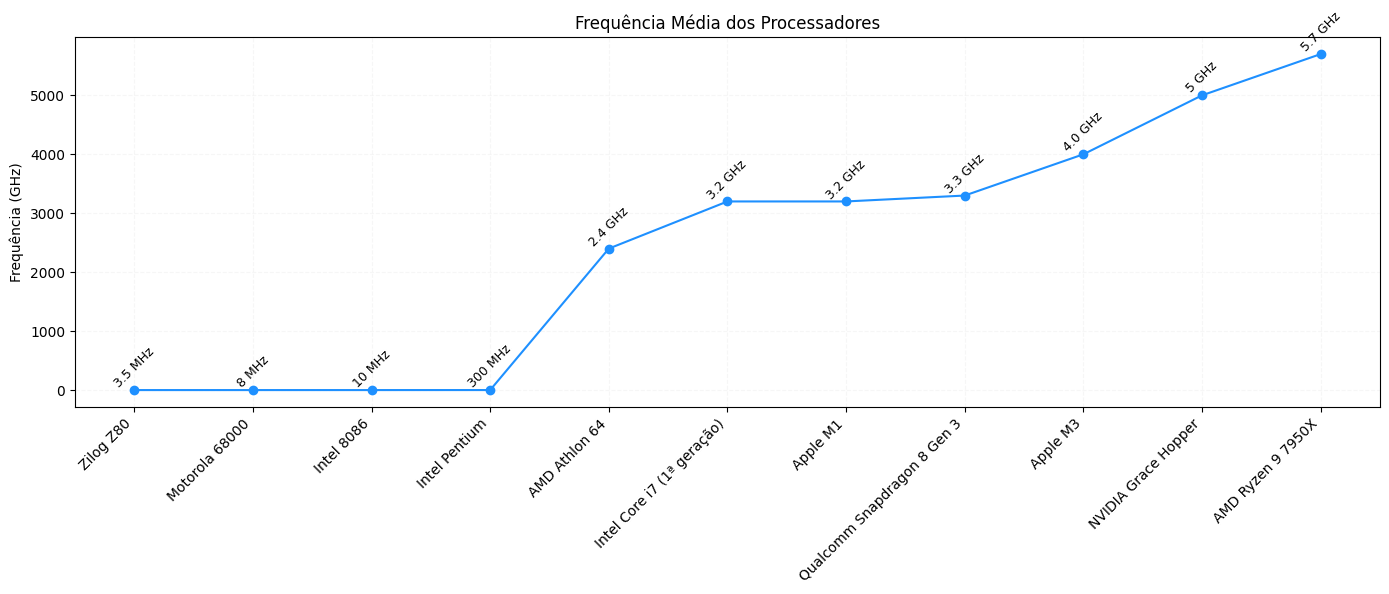

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Dados simplificados com foco em Arquitetura e Frequência
data = {
    "Arquitetura": ['Zilog Z80', 'Apple M3', 'AMD Ryzen 9 7950X', 'Qualcomm Snapdragon 8 Gen 3', 'NVIDIA Grace Hopper',
                    'Intel 8086', 'Motorola 68000', 'Intel Pentium',
                    'AMD Athlon 64', 'Intel Core i7 (1ª geração)', 'Apple M1'
                    ],
    "Frequência (GHz)": ["3.5 MHz", "4.0 GHz", "5.7 GHz", "3.3 GHz", "5 GHz",
                         "10 MHz", "8 MHz", "300 MHz",
                         "2.4 GHz", "3.2 GHz", "3.2 GHz"
    ]
}

df = pd.DataFrame(data)

# Função para converter frequência textual em valor médio em GHz
def parse_freq(freq):
    freq = freq.lower().strip()
    if 'mhz' in freq:
        return float(freq.replace('mhz', '')) / 1000
    elif 'ghz' in freq:
        nums = freq.replace('ghz', '')
        return (float(nums)) * 1000
    else:
        return np.nan  # Caso "Variável" ou outros

# Aplicar parsing
df["Freq Num (GHz)"] = df["Frequência (GHz)"].apply(parse_freq)
df = df.sort_values(by="Freq Num (GHz)")


# Plot
plt.figure(figsize=(14, 6))
plt.plot(df["Arquitetura"], df["Freq Num (GHz)"], marker='o', color='dodgerblue')
for i, row in df.iterrows():
    plt.text(row["Arquitetura"], row["Freq Num (GHz)"], row["Frequência (GHz)"],
             ha='center', va='bottom', fontsize=9, rotation=45)


plt.xticks(rotation=45, ha='right')
plt.ylabel("Frequência (GHz)")
plt.title("Frequência Média dos Processadores")
plt.grid(True, linestyle='--', alpha=0.1)
plt.tight_layout()
plt.show()
